# Linear Regression (線性回歸)

In [406]:
import numpy as np
import pandas as pd

In [416]:
avg2 = pd.read_csv('.\Datas\Problem 1\Averaged homework scores.csv', header = None)
exam2 = pd.read_csv('.\Datas\Problem 1\Final exam scores.csv', header = None)
xx_train = avg2[:400]
yy_train = exam2[:400]
xx_test = avg2[400:]
yy_test = exam2[400:]

In [418]:
import matplotlib.pyplot as plt

##### 嘗試改變Learning rate 'a'= ?

In [415]:
x_train = (xx_train - xx_train.mean())/xx_train.std()
y_train = (yy_train - yy_train.mean())/yy_train.std()

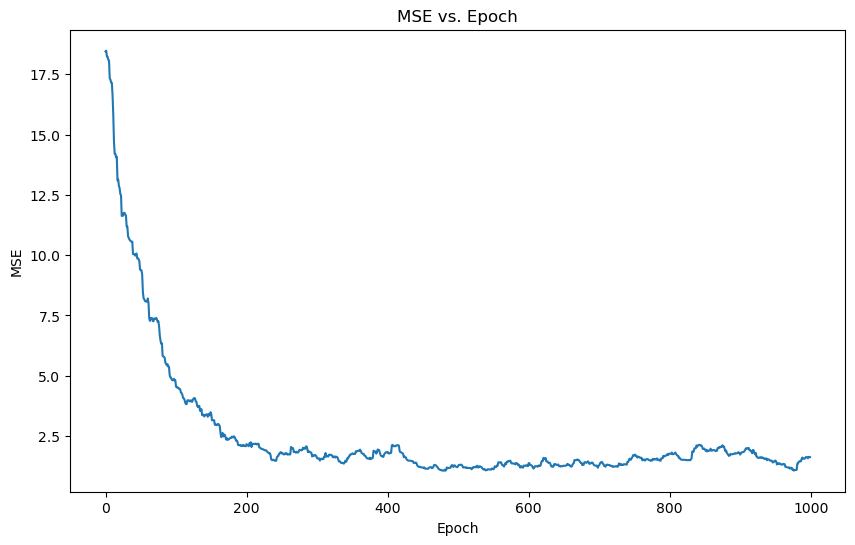

In [426]:
a = 0.01
T = 1000
w = 0.0
b = 0.0
x_train = np.array(x_train)
y_train = np.array(y_train)
mse_list = []
for t in range(0, T):
    i = np.random.randint(0, len(y_train))  # 选择一个随机索引
    y_pred = w * x_train[i] + b
    loss = (y_pred - y_train[i]) ** 2
    dw = x_train[i] * (y_pred - y_train[i])
    db = y_pred - y_train[i]
    w -= a * dw
    b -= a * db
    y_pred_test = w * xx_test + b
    mse_test = np.mean((y_pred_test - yy_test) ** 2)/400
    mse_list.append(mse_test)
    #print(loss)
plt.figure(figsize=(10, 6))
plt.plot(range(T), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.show()

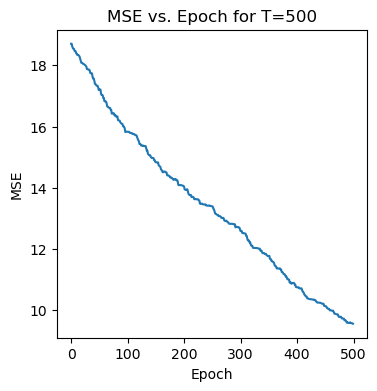

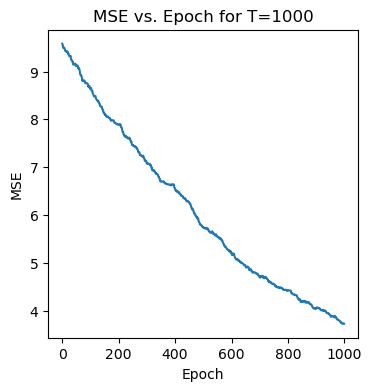

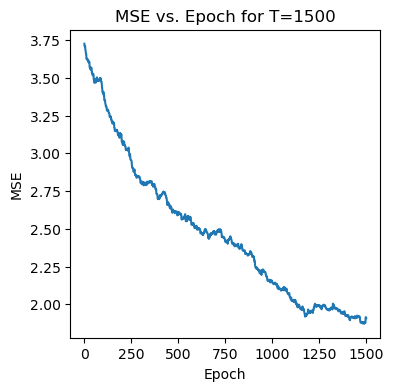

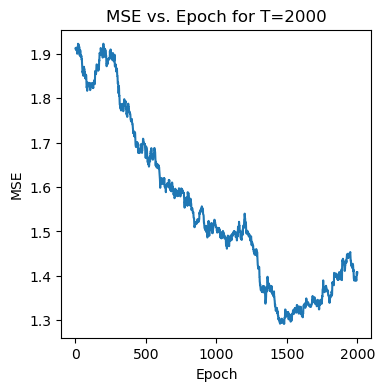

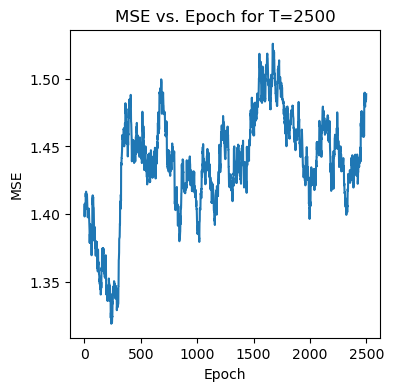

In [439]:
import matplotlib.pyplot as plt

a = 0.001
w = 0.0
b = 0.0
x_train = np.array(x_train)
y_train = np.array(y_train)

# 定義一個包含不同Epoch值的列表
T_values = [500, 1000, 1500, 2000, 2500]

for T in T_values:
    mse_list = []  # 存储每个训练周期的 MSE
    for t in range(0, T):
        i = np.random.randint(0, len(y_train))  # 选择一个随机索引
        y_pred = w * x_train[i] + b
        loss = (y_pred - y_train[i]) ** 2
        dw = x_train[i] * (y_pred - y_train[i])
        db = y_pred - y_train[i]
        w -= a * dw
        b -= a * db

        # 计算测试集上的 MSE 并存储到列表中
        y_pred_test = w * xx_test + b
        mse_test = np.mean((y_pred_test - yy_test) ** 2)/400
        mse_list.append(mse_test)

    # 绘制 MSE 随训练周期变化的图像
    plt.figure(figsize=(4, 4))
    plt.plot(range(T), mse_list)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'MSE vs. Epoch for T={T}')
    plt.show()


In [ ]:
# 计算测试集上的 MSE
y_pred_test = w * xx_test + b
mse_test = np.mean((y_pred_test - yy_test) ** 2)/400
mse_test

##### 學習效率0.01，得不到想要的效果。

## SGD Algorithm

a=0.0003
T=10000
w = [0.0,0.0]
for t in range(0,T):
    w[0]=w[0]-a*(w[0]+w[1]*x_mean-y_mean)
    w[1]=w[1]-a*(w[0]*x_mean+w[1]*x2_mean-xy_mean)
print(w[1])
print(w[0])
n = len(y_test)
mse = ((predict(x_test) - y_test) ** 2).sum()/n
mse

In [6]:
def predict(value):
    return w[0] + w[1] * value

In [440]:
n = len(y_test)
mse = ((predict(x_test) - y_test) ** 2).sum()/n
mse

NameError: name 'x_test' is not defined

In [ ]:
y_train_pred = predict(x_test)

In [ ]:
# 繪製測試資料集
plt.scatter(x_test, y_test, color='red', alpha = 0.5)

# 繪製由訓練資料得到的線性回歸結果
#plt.scatter(x_train, y_train, color='blue', alpha = 0.7)

# = np.linspace(0, 10, 100)
y = w[1] * x + w[0]
plt.plot(x, y, color='green')
# 設置圖形標題和軸標籤
plt.title('Linear Regression')
plt.xlabel('Average Homework Score')
plt.ylabel('Final Exam Score')
# 顯示圖形
plt.show()

## Batch Gredient Decent of Linear Regression

In [178]:
# 定义超参数
a = 0.005
T = 1000

batch_size = 50  # 定义小批量大小
w = 0.0
b = 0.0

# 将训练集转换为NumPy数组
x_train = np.array(x_train)
y_train = np.array(y_train)

# 循环迭代
for t in range(0, T):
    # 随机选择小批量样本
    batch_indices = np.random.choice(len(y_train), size=batch_size, replace=False)
    
    # 初始化小批量的累积梯度
    dw_batch = 0
    db_batch = 0
    
    for i in batch_indices:
        y_pred = w * x_train[i] + b
        loss = (y_pred - y_train[i]) ** 2
        dw = x_train[i] * (y_pred - y_train[i])
        db = y_pred - y_train[i]
        
        # 累积梯度
        dw_batch += dw
        db_batch += db

    # 更新参数 using mini-batch gradient descent
    w -= a * (dw_batch / batch_size)
    b -= a * (db_batch / batch_size)

# 计算测试集上的 MSE
y_pred_test = w * xx_test + b
mse_test = np.mean((y_pred_test - yy_test) ** 2)
print('Test MSE:', mse_test)

Test MSE: 7094.761533519179


#### 劃出plot

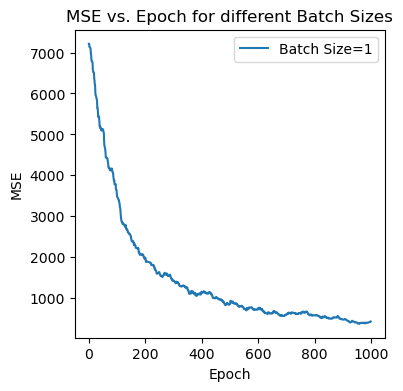

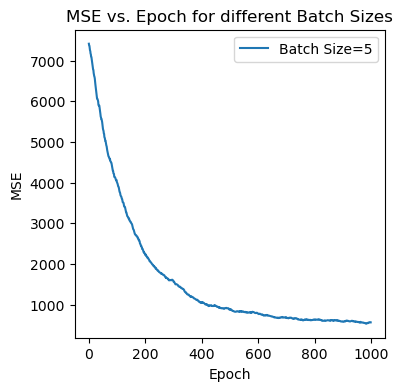

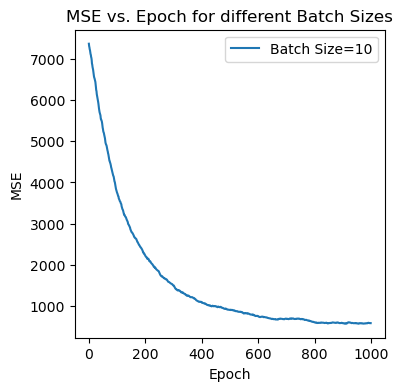

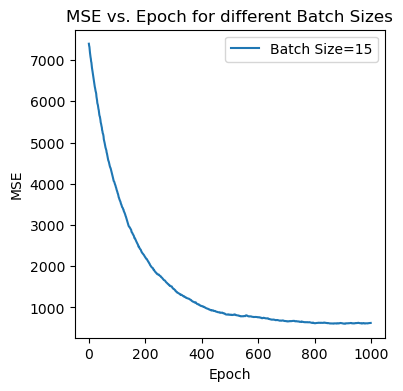

In [438]:
import matplotlib.pyplot as plt

# 定義超參數
a = 0.005
T = 1000

# 定義一個包含不同批次大小的列表
batch_sizes = [1, 5, 10, 15]

# 將訓練集轉換為NumPy數組
x_train = np.array(x_train)
y_train = np.array(y_train)

for batch_size in batch_sizes:
    w = 0.0
    b = 0.0
    mse_list = []  # 存儲每個訓練周期的 MSE

    for t in range(0, T):
        # 隨機選擇小批量樣本
        batch_indices = np.random.choice(len(y_train), size=batch_size, replace=False)

        # 初始化小批量的累積梯度
        dw_batch = 0
        db_batch = 0

        for i in batch_indices:
            y_pred = w * x_train[i] + b
            loss = (y_pred - y_train[i]) ** 2
            dw = x_train[i] * (y_pred - y_train[i])
            db = y_pred - y_train[i]

            # 累積梯度
            dw_batch += dw
            db_batch += db

        # 更新參數 using mini-batch gradient descent
        w -= a * (dw_batch / batch_size)
        b -= a * (db_batch / batch_size)

        # 計算測試集上的 MSE 並存儲到列表中
        y_pred_test = w * xx_test + b
        mse_test = np.mean((y_pred_test - yy_test) ** 2)
        mse_list.append(mse_test)

    # 繪製 MSE 隨訓練周期變化的圖像
    plt.figure(figsize=(4, 4))
    plt.plot(range(T), mse_list, label=f'Batch Size={batch_size}')

    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE vs. Epoch for different Batch Sizes')
    plt.legend()
    plt.show()


當批次大小（batch size）增大時，每一次參數更新考慮的數據就更多，這使得參數更新的方向更加接近於基於所有訓練數據計算出的真實梯度方向。因此，當批次大小增大時，參數更新的方向通常會更加穩定，這就導致了損失函數的值變化更加平滑。

相反，當批次大小較小（例如1，即隨機梯度下降法）時，每一次參數更新只考慮一個訓練樣本，這可能導致參數更新的方向具有較大的隨機性，因此損失函數的值可能會出現較大的波動。

然而，雖然增大批次大小可以使得損失函數的值變化更加平滑，但也可能使模型變得更容易陷入局部最優解，而不是全局最優解。這是因為較大的隨機性有時可以幫助模型跳出局部最優解。因此，在選擇批次大小時需要權衡其對模型性能和訓練穩定性的影響。

# Logistic Regression (羅吉斯回歸)

##### 定義sigmoid function

In [234]:
import math
import random
def sigmoid(s):
    return(1/(1+np.exp(-s)))

### Sigmoid Fuction 

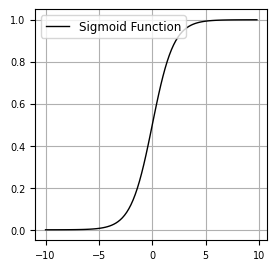

In [235]:
tmp1 = np.zeros(100)
tmp2 = np.zeros(100)
for i in range(0, 100):
    tmp1[i] = i/5 - 10
    tmp2[i] = sigmoid(tmp1[i])
plt.rcParams["figure.figsize"] = (3, 3)
plt.plot(tmp1,tmp2,"k-",linewidth=1,label="Sigmoid Function")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(loc="upper left", fontsize=8.5)
plt.grid()
plt.show()

In [236]:
#Read data
path2 = "Datas/Problem 2/"
dataset_x1 = pd.read_csv(path2 + "Averaged homework scores.csv", header = None)[0]
dataset_x2 = pd.read_csv(path2 + "Final exam scores.csv", header = None)[0]
dataset_label = pd.read_csv(path2 + "Results.csv", header = None)[0]

In [237]:
data_X = list(zip(dataset_x1,dataset_x2,dataset_label)) #pack
random.shuffle(data_X) #shuffle
training, testing = data_X[:400],data_X[400:] #split
#unpack
x1_train, x2_train, y_train= zip(*training)
x1_test, x2_test, y_test = zip(*testing)
x1_train = np.array(x1_train)
x2_train= np.array(x2_train)
y_train= np.array(y_train)
x1_test= np.array(x1_test)
x2_test= np.array(x2_test)
y_test= np.array(y_test)

In [241]:
def logistic_plot(x1,x2,label):
  plt.figure(figsize=(5, 5))
  idx = np.where(label==0)[0]
  plt.scatter(x1[idx],x2[idx],color='b',label='Admitted')
  idx = np.where(label==1)[0]
  plt.scatter(x1[idx],x2[idx],color='r',label='Rejected')
  plt.title("test data")
  plt.legend()
  plt.grid()
  plt.show()

##### 點的散佈圖

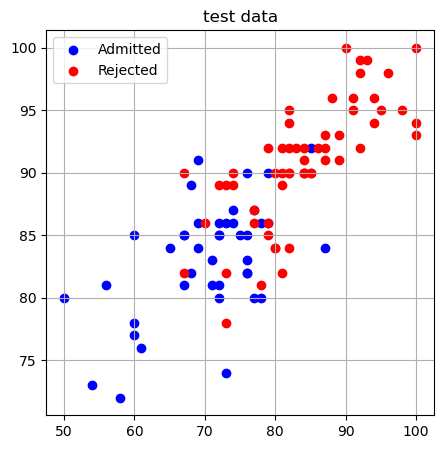

In [242]:
logistic_plot(x1_test, x2_test, y_test)

##### 資料正規化

In [240]:
x1_train = (x1_train - x1_train.mean()) / x1_train.std()
x2_train = (x2_train - x2_train.mean()) / x2_train.std()

#### 點的散佈圖(正規化後的)

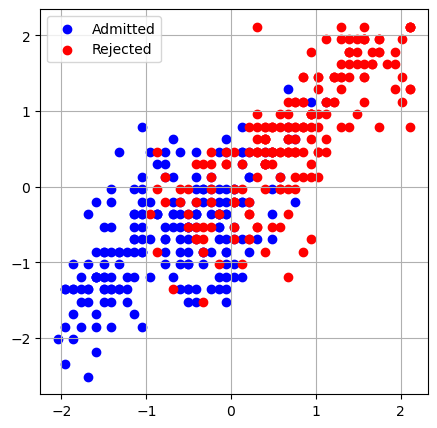

In [17]:
logistic_plot(x1_train, x2_train, y_train)

## Logistic Regression

In [261]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 初始化權重和偏置
w = np.zeros(2)
b = 0

# 設定學習率和迭代次數
lr = 0.75
epochs = 1000

# 將 x1_train 和 x2_train 組合成特徵矩陣 X
X = np.array([x1_train, x2_train]).T

# 開始訓練
for _ in range(epochs):
    # 計算模型的預測值
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # 計算梯度
    dw = np.dot(X.T, y_pred - y_train) / len(y_train)
    db = np.sum(y_pred - y_train) / len(y_train)

    # 更新權重和偏置
    w -= lr * dw
    b -= lr * db


#### Regression

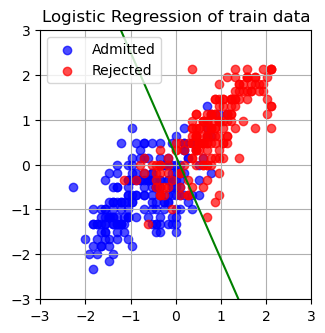

In [264]:
w1 = w[0]
w2 = w[1]
x1 = np.linspace(-5, 5, 100)

# 根據方程式計算 x2
x2 = -w1 / w2 * x1 - b / w2

# 畫出決策邊界
# 畫出其他數據點和圖例等
plt.figure(figsize=(3.5, 3.5))
idx = np.where(y_train==0)[0]
plt.scatter(x1_train[idx],x2_train[idx],color='b',label='Admitted', alpha = 0.7)
idx = np.where(y_train==1)[0]
plt.scatter(x1_train[idx],x2_train[idx],color='r',label='Rejected', alpha = 0.7)
plt.legend()
plt.grid()
plt.plot(x1, x2, color='green', label='Decision Boundary')
plt.title('Logistic Regression of train data')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

##### 計算 logistic loss

In [248]:
epsilon = 1e-10
z = b+ w[0]*x1_test + w[1]*x2_test
predictions = sigmoid(z)

# 計算 logistic loss
log_loss = -np.mean(y_test*np.log(predictions) + (1-y_test)*np.log(1-predictions+epsilon + 1e-10))
log_loss

9.379735574739813

## Batch Gredient Regression of Logistic Regression

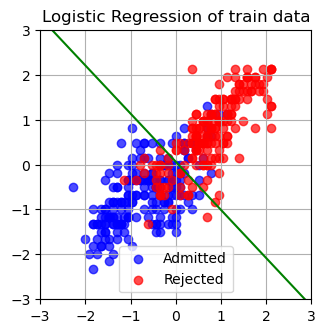

w[0], w[1] =  0.03443096651085529 0.0321195819064887


In [402]:
# Initialize weights and bias
w = np.zeros(2)
b = 0

# Set learning rate and number of epochs
lr = 0.0001
epochs = 1000

# Set the batch size
batch_size =10

# Combine x1_train and x2_train into feature matrix X
X = np.array([x1_train, x2_train]).T

# Start training
for _ in range(epochs):
    # Select a random batch of data
    batch_indices = np.random.choice(len(y_train), size=batch_size, replace=False)
    X_batch = X[batch_indices]
    y_batch = y_train[batch_indices]

    # Compute model predictions
    z = np.dot(X_batch, w) + b
    y_pred = sigmoid(z)

    # Compute gradients
    dw = np.dot(X_batch.T, y_pred - y_batch) / len(y_batch)
    db = np.sum(y_pred - y_batch) / len(y_batch)

    # Update weights and bias
    w -= lr * dw
    b -= lr * db

w1 = w[0]
w2 = w[1]
x1 = np.linspace(-5, 5, 100)

# 根據方程式計算 x2
x2 = -w1 / w2 * x1 - b / w2

# 畫出決策邊界
# 畫出其他數據點和圖例等
plt.figure(figsize=(3.5, 3.5))
idx = np.where(y_train==0)[0]
plt.scatter(x1_train[idx],x2_train[idx],color='b',label='Admitted', alpha = 0.7)
idx = np.where(y_train==1)[0]
plt.scatter(x1_train[idx],x2_train[idx],color='r',label='Rejected', alpha = 0.7)
plt.legend()
plt.grid()
plt.plot(x1, x2, color='green', label='Decision Boundary')
plt.title('Logistic Regression of train data')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()
print('w[0], w[1] = ', w[0], w[1])

In [403]:
z = b+ w[0]*x1_test + w[1]*x2_test
predictions = sigmoid(z)

# 計算 logistic loss
log_loss = -np.mean(y_test*np.log(predictions) + (1-y_test)*np.log(1-predictions+epsilon + 1e-10))
log_loss

2.145223177156614